# Homework (10 pts) - Optimization and Maximum Likelihood Estimation (MLE)

In [1]:
import numpy as np
import scipy as sp
import scipy.stats as st
import scipy.optimize as opt
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
mpl.rcParams['axes.labelsize'] = 18

1. (3 pts) Fit the current timeseries recording given below to the product of a rising and falling exponential. Plot the data overlaid with your fit and report the time constants for current rise and decay.

In [2]:
time_ms = np.linspace(0, 100, 101)
current_pA = np.array([-11.49925289,  47.87163206,  77.82980623, 109.04916588,
       137.62010282, 141.94716567, 159.25995009, 162.03097947,
       169.20088976, 150.97210903, 168.65277108, 149.20247783,
       153.59617938, 151.06279098, 150.93398619, 140.70934   ,
       118.80863167, 112.2713122 , 122.29273285, 123.42284245,
       117.07612207, 112.66697218, 100.11365881, 100.99447491,
        91.90813984,  95.01691512,  78.73823717,  78.20109493,
        67.30797833,  58.70762144,  75.20748366,  59.60008172,
        48.04512794,  45.51204506,  48.33190496,  47.79848838,
        42.31900093,  53.21292245,  41.59442254,  38.98401384,
        35.44797053,  39.45920882,  41.80935177,  36.41469405,
        31.3035501 ,  27.17029714,  20.28299317,  26.24758303,
        34.76692149,  18.19876214,  28.1050215 ,  16.59744975,
        11.62656454,  11.60027014,  22.35297263,   7.90069292,
        26.07745369,  21.67466275,  18.34160849,  27.04648996,
        25.81140063,  18.95182011,  10.48364962,   4.22172121,
        17.83417751,  14.5872188 ,  11.26693263,   3.61139229,
        21.78011655,   1.25676325,  18.03409068,  10.38417586,
        19.64215352,  12.45102715,   7.59781093,  17.0813896 ,
        -2.1329148 ,  18.18034971,   0.7301292 ,  -0.39345015,
        -3.75602896,   9.42749194,   4.25190816,   8.54536176,
        -7.55344623,  -5.43343497,  13.1545137 ,  -6.93928046,
        -0.89630299,  -4.43433982,   2.7434125 ,   5.96211222,
        -2.80638786,   0.44338489,   7.24650799,  14.93993946,
         0.46211316,  13.89706307,  -0.29285552,   9.10781943,
        13.72470762])

Time constants for rise and decay are 5.87 and 18.72 ms, respectively.


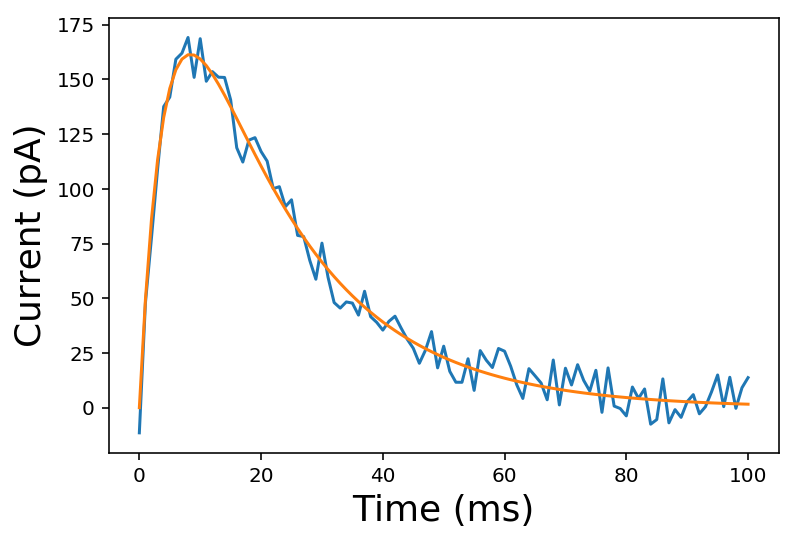

In [7]:
def riseAndFallExp(time, Amp, riseTau, fallTau):
    return Amp * (1 - np.exp(-time / riseTau)) * np.exp(-time / fallTau)

result = opt.curve_fit(riseAndFallExp, time_ms, current_pA)
Amp, riseTau, fallTau = result[0]

plt.plot(time_ms, current_pA)
plt.plot(time_ms, riseAndFallExp(time_ms, Amp, riseTau, fallTau))
plt.xlabel('Time (ms)')
plt.ylabel('Current (pA)');

print(f"Time constants for rise and decay are {riseTau :.2f} and {fallTau :.2f} ms, respectively.")

2. (3 pts) You record spikes from a single neuron. The observed number of spikes per second is given below. What is the maximum likelihood estimate for the neuron's average spike rate? Plot the observed data overlaid with the most likely distribution. Hint: Which distribution should you use?

In [8]:
observedNumberOfSpikesPerSecond = np.array([11, 11,  5, 11, 14, 10,  6, 12, 11, 15,  8, 18, 13, 11, 16, 16,  3,
        7, 11, 11, 14,  9, 18, 13, 16, 14, 11, 18, 17,  8, 15,  8, 13, 16,
       11,  8,  7, 10,  8, 13, 17,  8, 10, 21, 13, 14, 18, 15, 12,  9, 13,
       11, 16,  8,  6, 19,  3, 10, 15,  8, 10,  8, 18, 14, 12,  2, 14, 16,
       10, 14, 10, 15, 21, 13,  8,  8, 11, 13, 10, 12,  9, 12,  9,  8, 13,
       14, 12, 11, 10, 10, 13,  8, 11, 13, 10,  7, 13, 18, 13,  8,  4, 13,
       12,  9, 10, 13,  8, 13,  9,  7, 13, 14, 12, 15, 19, 15,  5, 16, 10,
       11, 14, 15, 14,  5, 13, 11, 10, 23, 20, 12, 20, 16,  6,  8,  9, 14,
        9,  8,  8, 17,  7, 13,  8, 15, 10,  8, 10, 15, 15, 10, 17,  6, 10,
       16, 15,  9, 11,  5, 20, 11,  8,  6,  9, 14, 10, 15, 14, 10, 12, 16,
        9, 16, 10, 12, 14, 13, 11,  5, 14, 12, 16,  6, 17, 15, 11, 15, 13,
       23, 12,  8, 10, 15, 11, 11, 11,  7, 11, 16, 14,  8])

Estimated spike rate is 11.82 per second.


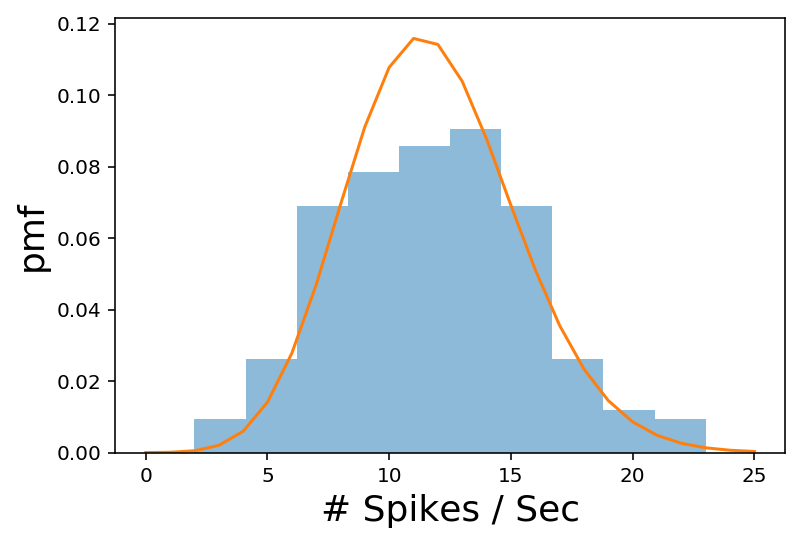

In [15]:
avgSpikeRatePerSec = observedNumberOfSpikesPerSecond.mean()

print(f"Estimated spike rate is {avgSpikeRatePerSec :.2f} per second.")

numSpikesPerSecDist = st.poisson(avgSpikeRatePerSec)

numSpikesPerSec = np.arange(26)

plt.hist(observedNumberOfSpikesPerSecond, density=True, alpha=0.5)
plt.plot(numSpikesPerSec, numSpikesPerSecDist.pmf(numSpikesPerSec))
plt.xlabel('# Spikes / Sec')
plt.ylabel('pmf');

3. (4 pts) You record the time-dependent current through a single ion channel at +50 mV in symmetrical ionic solutions (time series data is below, sample interval is 100 microseconds). Based on the data, determine the channel's three conductance states and their relative probabilities. Hint: First find the three current levels, then convert to conductance using Ohm's law.

In [16]:
# Single channel current record (pA). Sample interval is 100 microseconds.
current_pA = np.array([ 0.00000000e+00, -2.35394235e-01,  6.07833286e-01, -8.70306907e-01,
       -1.25841170e+00, -1.74297695e-02, -5.58284641e-01,  2.78609759e+00,
        4.78248770e+00,  4.69373968e+00,  5.67881976e+00,  4.99705998e+00,
        6.30184317e+00,  4.83487181e+00,  3.03183825e+00,  5.83206241e+00,
        5.35819319e+00, -4.60627502e-01,  1.07486132e+00,  2.91376156e+00,
        2.10070182e+00,  1.18350752e+00,  1.91661039e+00,  2.27939756e+00,
        1.29232847e+00,  1.48268820e+00,  4.61369862e+00,  5.00355371e+00,
       -1.44819161e+00, -5.51972368e-01,  2.98400128e-01,  7.46190742e-01,
       -6.42705287e-01,  4.58047840e-01, -7.41532194e-01, -6.73262703e-01,
        5.91905023e-01,  2.41612119e-01,  2.99097843e+00,  1.68857562e+00,
        2.54164978e+00,  2.73297315e+00,  2.44545466e+00,  1.17925091e+00,
        2.75972609e+00,  1.37661225e+00,  1.98199173e+00,  1.76662384e+00,
        2.51339495e+00,  1.97739440e+00,  2.52634436e+00,  8.51353231e-01,
       -5.73178723e-01,  1.63084881e+00,  3.21066731e+00,  6.50098026e+00,
        3.82993941e+00, -3.40622218e-01, -6.44956162e-01, -5.14403137e-01,
       -2.07115509e-01, -9.05523326e-01,  3.59862599e-01,  1.35010587e-01,
       -4.15770501e-03, -2.82345061e-01,  2.81339139e-01, -2.87053959e-01,
        2.39041366e+00,  4.35900735e-01,  1.66756888e+00,  1.91837972e+00,
        1.11969643e+00,  1.31477977e+00,  1.45233161e+00,  1.70625427e+00,
        2.18176920e+00,  2.23218499e+00,  1.66333979e+00,  1.74158175e+00,
        3.86019668e+00,  1.50568450e+00,  1.25141608e+00,  2.20152044e+00,
        4.69589336e+00,  4.25880606e+00,  4.61861707e+00, -5.94591437e-01,
       -3.65028789e-01,  3.23722523e-01,  6.19410844e+00,  5.58166939e+00,
        3.85071042e+00,  4.40009238e+00,  8.12198881e-01,  4.42617977e-01,
        5.95656399e-01, -1.10237496e+00, -8.98242376e-01,  7.94843118e-02,
        5.02012149e+00,  5.47512233e+00,  5.25582988e+00,  5.49404794e+00,
        4.28887172e+00,  4.61565686e+00,  3.83608122e+00,  2.35337233e+00,
        3.67022237e+00, -1.11334635e+00, -3.18741077e-01, -3.99539006e-01,
        8.52420828e-02, -3.93682375e-01, -2.68777379e-02, -5.10853746e-02,
       -1.15787989e-01, -3.52036704e-01, -5.32425938e-01, -1.24672576e+00,
        3.78593323e-01,  1.15892914e+00, -5.83994444e-01,  2.78768157e-01,
        1.39543987e-01, -5.79143158e-01,  3.39523161e+00,  5.22938269e+00,
        5.12957734e+00,  5.99947723e+00,  3.47899706e+00,  4.54859360e+00,
        4.43192113e+00,  6.18596821e+00,  4.80092205e+00,  3.84851588e+00,
        5.52286481e+00,  4.22197068e+00,  5.25556506e+00,  3.39726765e+00,
        3.95806880e+00,  5.19732271e-02,  3.82649645e-01, -2.81867318e-01,
        1.54658894e-01,  7.41042105e-01,  1.19612111e-01,  3.08308106e-01,
        1.30592584e-01, -4.90093303e-01,  1.76953535e-02,  3.70764975e-01,
        6.93714048e-01,  1.34719391e-03, -1.32212088e-01, -5.78001048e-01,
        1.75952612e-01, -3.85325860e-01,  2.97573118e+00,  4.78669205e+00,
        4.61278529e+00,  2.76800451e+00,  4.16105050e+00,  5.33284168e+00,
       -6.91454966e-01,  7.44278510e-01, -1.78087687e-01, -1.07690707e-02,
       -5.15949200e-01, -2.12352159e-02,  1.43678730e-02,  4.10445502e-01,
        1.02651487e-01, -6.21051441e-02,  9.73525935e-02,  3.51205459e-01,
       -1.53660529e-01, -4.67862784e-01,  4.76170250e-01,  1.48609704e-01,
        6.97893890e-01,  5.81011874e+00,  1.17941897e+00, -3.81008936e-01,
        1.12724230e+00, -6.24757237e-01,  7.51028577e-01,  2.66629092e-01,
        5.50412454e+00,  4.19133725e+00,  4.09773610e+00,  4.91765871e+00,
        4.48516386e+00,  3.42712419e+00,  5.04727020e+00,  5.76303846e+00,
        5.64527893e+00,  5.31863192e+00,  6.84720646e+00,  5.10201998e+00,
        6.13293645e+00,  5.17184085e+00,  3.28588438e+00,  6.21459053e+00,
        8.86636021e-01,  4.30073067e-01, -1.82835345e-01,  6.23432272e+00,
        4.89739508e+00,  4.95640821e+00,  5.86488527e+00,  4.76614324e+00,
        5.56635125e+00,  5.58515436e+00,  5.32609459e+00,  4.44922633e+00,
        4.68761265e+00,  5.72018314e+00,  4.53798775e+00,  5.35117506e+00,
        6.55592233e+00,  7.31036662e-01,  1.00165977e-02,  1.00127817e+00,
       -5.12566393e-01,  6.64430341e-02,  4.94824937e-02, -2.52122454e-01,
       -1.66718603e-03,  4.01108487e+00,  5.38854432e+00,  4.40596752e+00,
        4.31745088e+00,  4.09093292e+00,  5.49939608e+00,  4.38892305e+00,
        7.06768792e+00,  4.83096902e+00,  4.67238235e+00,  4.64054073e+00,
        5.97315744e+00,  3.64447394e+00,  6.52360451e+00,  1.67080047e-01,
        1.58743815e-01, -4.97994325e-01,  2.77442586e-01,  8.40816780e-01,
       -2.76123328e-01,  2.96957222e-01,  8.67329185e-01, -2.15183359e-01,
        1.97688390e+00,  2.50587484e+00,  5.33830774e+00,  6.35012627e+00,
        4.72571451e+00,  4.12477664e+00,  4.98959977e+00,  4.99791463e+00,
        4.31788380e+00,  4.82419428e+00,  6.24065982e+00,  4.71929306e+00,
        6.47166049e+00,  4.64263725e+00,  4.25388140e+00,  4.97108273e+00,
        5.36356874e+00,  6.09683618e+00,  4.70881307e+00,  3.90790662e+00,
        4.60344649e+00,  2.96657248e+00,  4.91172918e+00,  4.86004171e+00,
       -1.03664236e-01, -1.28981910e+00,  5.65662422e+00,  4.84480518e+00,
        4.63513934e+00,  3.88702111e+00,  5.40899961e+00,  6.58228256e+00,
        4.22522761e+00,  4.98799388e+00,  3.82113599e+00,  5.34481406e+00,
        3.48372344e+00,  2.76332305e+00,  5.07734330e+00,  4.19223767e+00,
        5.44372783e+00,  5.74934559e+00,  4.93328862e+00,  6.47041815e+00,
        4.80420346e+00,  4.76978276e+00,  5.05511742e+00,  4.95050316e+00,
        3.94901753e+00,  3.92472554e+00,  4.31938430e+00,  4.65210990e+00,
        6.15180663e+00,  5.07877829e+00,  6.56012409e+00,  4.20723605e+00,
        3.81550402e+00,  4.47061072e+00, -5.69054016e-01, -7.84616662e-01,
       -1.98468796e-01,  5.38468108e-01,  5.73989511e-01,  1.50372009e-02,
        1.96245180e-01, -7.09689441e-01,  7.76448894e-01,  5.03919904e-01,
       -1.69266354e-01, -7.83270455e-01, -8.94048883e-01, -1.17435501e+00,
       -6.64616930e-01,  3.99032164e-01,  7.07776055e-01, -5.98138336e-01,
        2.16213375e-01,  3.04162160e-01, -1.24266851e+00, -1.42416970e-01,
        6.19975070e-01,  4.84911325e-01,  1.95967750e-01, -6.37770775e-01,
       -5.83109741e-01, -9.62725747e-01, -5.18823095e-01, -5.76940857e-01,
        4.62372911e-01,  8.69445149e-01,  5.12538010e-01,  3.17208541e-01,
        4.72208582e-01,  2.27873851e+00,  2.57947901e+00,  2.55378886e+00,
       -6.21728442e-01, -8.04110171e-01,  6.13548342e-01, -2.34156894e-01,
        5.60106130e+00,  4.58944257e+00,  4.52930781e+00,  6.89404816e+00,
        5.18856013e+00,  3.70978746e+00,  5.64345571e+00,  4.17924589e+00,
        5.97330067e+00,  1.53794649e-01,  2.05903817e-01,  1.61260938e-01,
       -3.25067734e-01,  1.50956982e-01,  4.09703821e-01, -2.67476991e-01,
        5.50912650e+00, -3.84203946e-01, -1.09823328e-01, -9.11846052e-03,
       -6.60663999e-02,  8.09315308e-01,  5.69463865e-01, -4.69163402e-01,
       -1.25743717e-01,  3.17528871e-01, -8.31831349e-01,  5.14788905e-01,
       -4.50043642e-01, -2.09737709e-01, -5.43059326e-02, -5.14679082e-01,
       -1.84233722e-01,  2.92250622e+00,  6.04219983e+00,  5.89374422e+00,
        5.08316147e+00,  5.28852812e+00,  4.55730956e+00,  3.40790975e+00,
        4.26451066e+00,  4.39505582e+00,  3.01505874e+00,  5.22432918e+00,
        4.12567297e+00,  3.85602698e+00,  5.32965183e+00,  4.14539342e+00,
        3.68378241e+00,  4.47342468e+00,  5.05517480e+00,  6.59834411e+00,
        5.55650193e+00,  6.91460435e+00,  4.21584833e+00,  6.02797597e+00,
        6.21484966e+00,  5.78263423e+00,  6.02205711e+00,  4.73538849e+00,
        6.78430844e+00,  5.31165875e+00,  4.16615106e+00,  6.24564358e+00,
        6.12474151e+00,  4.78900502e+00,  5.87334550e+00,  6.09462959e+00,
        5.44633275e+00,  5.04946494e+00,  3.55625112e+00,  1.97616094e+00,
        1.27371899e+00,  5.15156729e-02,  6.96208827e-01,  6.69849259e-01,
        4.45580988e+00,  4.02572944e+00,  2.17927668e+00,  6.55604770e+00,
        3.33227557e+00,  4.82226224e+00,  4.89847403e+00,  2.84086030e+00,
       -5.86029968e-01,  2.36353907e-01,  2.39716393e-01, -7.07255090e-01,
       -2.81219915e-01,  2.51116339e-01, -1.26565191e-01,  3.62540753e+00,
        3.32995387e+00,  5.66744265e-01, -3.40645496e-02, -5.84484719e-01,
        5.78613493e-02,  3.23157318e-01,  9.60771854e-02, -4.16136912e-01,
       -7.04181139e-02,  4.23666253e-01, -5.74010844e-01, -1.71738551e-01,
       -2.42243438e-01,  2.18816668e-01,  3.07139554e-01,  3.49351347e-01,
        8.56725469e-01,  1.23632321e+00,  1.88519013e-01, -2.98144414e-01,
        4.98438837e-02,  1.14320966e+00, -1.09747355e-01,  3.19141747e+00,
        1.67241140e+00,  3.66922162e+00,  1.46583340e+00,  2.85149140e+00,
        2.74238434e+00,  2.32424380e+00,  2.86499143e+00,  2.38703208e+00,
        2.05881964e+00,  1.75789261e+00,  1.77086193e+00,  1.70326953e+00,
        2.52617867e+00,  2.07655081e+00,  1.07607905e+00,  2.43453813e+00,
        2.26353454e+00,  1.90824367e+00,  1.01588795e+00,  1.93368475e+00,
        1.99684441e+00,  5.11396615e+00, -4.58835008e-01,  8.90157108e-01,
        3.88577889e-01,  1.80190657e+00,  9.10633663e-01,  2.89357535e+00,
        5.66504206e+00,  5.49020086e+00,  3.08693614e+00,  4.67819246e+00,
        5.19606891e+00,  4.82684580e+00,  3.88366081e+00,  4.49152794e+00,
        4.34359416e+00,  4.35466445e+00,  3.30521825e+00,  6.25648225e+00,
        5.02653493e+00, -5.70298789e-02,  1.19753305e+00,  3.42595810e-01,
        1.67493637e+00,  2.26428932e+00,  1.47106154e+00,  1.50521973e+00,
        2.09963688e+00,  1.95238363e+00,  1.71197507e+00,  2.18808090e+00,
        3.20780417e+00,  1.65151195e+00,  1.61326552e+00,  3.09809517e+00,
        1.88794987e+00,  2.18740681e+00,  7.74253556e-01,  2.77897882e+00,
        1.72264326e+00,  2.41937107e+00,  1.44320491e+00,  5.17589501e-01,
        2.00088254e+00,  2.41455666e+00,  2.51899870e+00,  1.64813695e+00,
        4.68627910e+00,  5.67713834e+00,  3.52135890e+00,  4.89507513e+00,
        7.18450996e+00,  4.11871362e+00,  5.17891649e+00,  6.31167964e+00,
        5.46112205e+00,  4.03201460e+00,  3.92611121e+00,  5.84590943e+00,
        5.36973422e+00,  5.59472581e+00,  4.28178480e+00,  4.37445322e+00,
        5.05222825e+00,  5.52243570e+00,  3.23795458e+00,  5.16305168e+00,
        5.26622084e+00,  6.01434228e+00,  4.12277624e+00,  6.21006910e+00,
        6.24229037e+00,  4.23761650e+00,  5.09941210e+00,  5.35582130e+00,
        4.09610898e+00,  5.42990944e+00,  4.46057780e+00,  5.57508105e+00,
        5.01842699e+00,  5.01288934e+00, -1.52280443e+00, -2.33384021e-02,
       -6.34707019e-02, -1.00099157e+00,  2.68210925e-01,  4.22525634e+00,
        5.33389294e+00,  3.42543670e+00,  5.47599883e+00,  3.93018892e+00,
        5.06096559e+00,  5.11148086e+00,  5.71579167e+00,  6.34809632e+00,
        6.11894498e+00,  4.82520063e+00,  5.33995915e+00,  4.76015774e+00,
        5.74386634e+00,  4.74162452e+00,  5.14921295e+00,  2.42957509e+00,
        5.22449423e+00,  4.61466962e+00,  3.45230630e+00,  4.42505258e+00,
        5.23595054e+00,  3.13562129e+00,  3.38412124e+00,  5.54940694e+00,
        5.24741588e+00,  5.20281489e+00,  5.78871816e+00,  4.73847482e+00,
        5.15666998e+00,  5.68131499e+00,  4.55421657e+00,  6.45650213e+00,
        6.32737988e+00,  4.53161324e+00,  4.03978912e+00,  5.69315915e+00,
        5.10470017e+00,  4.50330832e+00,  4.57634074e+00,  4.98727683e+00,
        5.10453786e+00,  4.60708248e+00,  2.53164025e-01, -4.43106675e-01,
        2.65099292e+00,  6.55287395e+00,  5.51439659e+00,  5.16165839e+00,
        3.58207227e+00,  1.00171123e+00, -1.34743915e-01,  1.07353283e+00,
        9.43654937e-01,  3.75702439e+00,  4.80809556e+00,  5.44679085e+00,
        3.54428702e-02,  4.57189642e-01, -6.22028786e-03,  4.92928767e-01,
        3.09224777e-01,  3.89566279e-01,  3.19268180e-01,  3.54326036e-01,
       -9.72095846e-01, -6.78172273e-01, -1.68570029e-01, -3.36378664e-01,
       -4.51651633e-01, -6.34563358e-01, -3.33411742e-01,  4.06929719e-01,
       -2.63869480e-01, -2.27360242e-01, -5.50530063e-01, -8.00015938e-02,
       -5.05033354e-01,  2.56639866e-01, -6.71518215e-02, -5.53206933e-01,
       -5.25135475e-01, -2.53552619e-01, -1.06549885e+00, -4.94171583e-01,
        3.42475039e-01,  8.41688979e-01,  3.32803148e-01, -5.20871100e-01,
        5.87397550e-02,  1.96749995e+00,  2.29304688e+00,  2.29672192e+00,
        7.35592817e-02,  1.75138038e+00,  1.75796971e+00,  2.69261781e+00,
        3.44781270e+00,  1.71453366e+00,  2.29723326e+00,  1.60633201e+00,
        3.06150336e+00,  1.32374036e+00,  1.94679548e+00,  1.22769026e+00,
        5.42947746e+00,  5.89559369e+00,  5.63004935e+00,  5.05891805e+00,
        5.28104571e+00,  2.72631153e+00,  5.49943719e+00,  4.67899259e+00,
        6.20384231e+00,  5.01494446e+00,  4.22665514e+00,  4.81657598e+00,
        2.38426134e+00,  5.38265912e+00,  6.42894192e+00,  3.06540277e+00,
        5.92706574e+00,  6.67872976e-01,  2.78216391e+00,  8.03945493e-01,
        2.72272307e+00,  2.52631306e+00,  1.86918398e+00,  2.46094378e+00,
        2.88882336e+00,  2.22845569e+00,  1.71159936e+00,  1.27204212e+00,
        3.00080403e+00,  1.63441038e+00,  1.89847505e+00,  2.92439964e+00,
        2.28317064e+00,  2.30928990e+00,  1.56514084e+00,  1.80904833e+00,
        4.15168874e+00,  4.41225582e+00,  5.36599510e+00,  5.73157588e+00,
        4.52129243e+00,  5.06654091e+00,  4.18619254e+00,  7.13478843e+00,
        1.92832261e+00,  1.39923528e+00,  1.55280253e+00,  2.41123612e+00,
        2.58210760e+00,  1.13366612e+00,  2.98031988e+00,  1.72448109e+00,
        2.16135015e+00,  1.79579051e+00,  2.45928505e+00,  9.65086076e-01,
        3.39874514e+00,  2.53253911e+00,  2.29074849e+00,  8.51206219e-01,
        1.90698624e+00,  2.27474697e+00,  2.36703413e+00,  1.11421027e+00,
        3.06094100e+00,  2.49187196e+00,  2.55557142e+00,  1.73560141e+00,
        1.32353615e+00,  1.20405983e+00,  8.01954351e-01,  3.63372157e+00,
        4.06946668e+00,  5.35883815e+00,  4.53815453e+00,  4.50734149e+00,
        4.42884467e+00,  5.15082273e+00,  5.38048767e+00, -4.83060337e-01,
        5.86324781e-01, -7.07635657e-01, -3.96769767e-02, -1.71928536e-01,
        1.59561715e-01,  5.72425704e-01,  5.03455513e+00,  2.47486072e+00,
        2.86333190e+00,  6.23822818e+00,  3.44193571e+00,  5.86772308e+00,
        5.91485831e+00,  5.63492174e+00,  1.98388811e-02,  1.91886033e-01,
       -2.86882974e-01,  3.39431116e-01, -5.11399980e-01,  7.32068641e-01,
        3.35959486e+00,  4.35632324e+00, -5.98912740e-01,  1.04535587e-01,
        8.27681537e-01, -1.23641570e+00,  2.56551076e+00,  5.59692672e+00,
        5.87656682e+00,  6.04474640e+00,  6.75038499e+00,  3.76111285e+00,
        6.15217880e+00,  5.22876038e+00,  5.38097539e-01,  2.49936229e-01,
        7.66582790e-01,  1.13116318e-01,  4.69509486e-01, -2.40432983e-01,
        3.64384014e-01, -3.93192343e-02, -4.67088178e-01,  2.37359997e+00,
        2.02762815e+00,  5.28426900e+00,  6.49650666e+00,  6.88385717e-01,
       -5.66918501e-01,  7.14217986e-01,  6.34703268e-04,  6.58382771e-01,
       -9.68954276e-01,  3.69113024e-01, -3.42755629e-02,  3.61400383e-01,
        1.68605611e-01,  1.32412039e+00,  4.99299216e+00,  5.85098743e+00,
        4.43981428e+00,  4.34171615e+00,  6.75843133e+00,  5.48285066e+00,
        4.72453113e+00,  6.26784060e+00,  3.79397173e+00,  4.46706639e+00,
       -5.16051490e-01,  1.80721884e+00,  1.27800963e+00,  2.65462601e+00,
        1.73931061e+00,  2.36206879e+00,  1.78028518e+00,  2.64296002e+00,
        2.53924418e+00,  2.68635313e+00,  1.52218848e+00,  1.80082431e+00,
        9.89247193e-01,  1.83857348e+00,  2.56870733e+00,  1.79388177e+00,
        6.43174868e+00,  4.05676529e+00,  5.16035089e+00,  8.10403268e+00,
        6.33395956e+00,  5.36969250e+00,  4.11021517e+00,  5.57863174e+00,
        2.39729125e+00,  4.87265882e+00,  1.53999248e+00,  3.16692176e-01,
       -9.68394495e-02, -5.48466391e-02,  5.03758778e-01, -3.86349026e-01,
        3.90149996e-01, -2.59305907e-01, -2.75176353e-01,  6.07524663e-01,
        1.51878435e-01,  4.89789530e-01, -3.63861950e-02, -3.59848445e-01,
        5.49975461e+00,  5.24749798e+00,  4.51709104e+00,  4.51697794e+00,
        3.26617802e+00,  5.41773177e+00,  5.08079949e+00,  4.47700465e+00,
        5.15032511e+00,  5.44431222e+00,  6.26265551e+00,  5.22118916e-02,
       -7.29572053e-01,  1.80990868e-01,  3.87541970e-01, -2.62406441e-01,
        2.25509443e-01,  2.21612096e-01, -9.27519392e-02,  7.82146116e-01,
        1.26083109e-01, -1.20822439e+00, -6.45699877e-01, -5.98345610e-01,
       -5.80377986e-01,  6.27625432e-03,  3.26924906e-01, -1.16486764e-01,
        1.07788700e-01, -3.23001830e-01,  4.69522684e-01,  1.15845476e+00,
       -5.73753815e-01,  5.94855932e+00,  4.81268300e+00,  3.59854874e+00,
        3.31126973e+00,  2.14634417e+00,  8.76389478e-01,  1.02613886e+00,
        1.82915419e+00,  2.94004634e+00,  3.85671064e+00,  5.27870687e+00,
        7.02120176e+00,  6.31854655e+00,  7.83279294e+00,  8.44696228e-01,
        6.06551408e-01,  2.44036705e+00,  2.14885036e+00,  2.42615539e+00,
        1.24812405e+00,  2.51986227e+00,  1.55529541e+00,  5.88929664e+00,
        5.27394828e+00,  4.31596058e+00,  3.17104408e+00,  5.57176325e+00,
        5.68050660e+00,  3.85081684e+00,  6.14503970e+00,  3.54355996e+00,
        4.97140261e+00,  4.45069669e+00,  4.93222238e+00,  8.95799483e-02,
       -3.77974444e-01,  5.62340607e-01,  1.50443813e-01, -3.38391311e-01,
       -1.16628334e+00, -8.43633004e-01, -5.06260355e-02, -1.57859465e-01,
       -1.38528486e-01, -1.30226510e-01, -5.15944750e-01,  2.69338674e-01,
       -2.11566463e-02, -2.13466381e-02,  8.10999760e-01,  7.15971437e-02,
        6.59688135e+00,  2.64405256e+00,  1.51465420e+00,  2.22868548e+00,
        2.82653800e+00,  1.72987041e+00,  1.92337588e+00,  2.99460875e+00,
        1.64045313e+00,  2.00815223e+00,  8.26479943e-01,  1.26351041e+00,
        2.18910372e+00,  1.07603690e+00,  1.15761229e+00,  2.12761980e+00,
        2.90168507e+00,  2.32714947e+00,  2.99920749e+00,  2.73666409e+00,
        1.52107281e+00,  1.49327412e+00,  2.04311653e+00,  1.46003820e+00,
        2.25981785e+00,  1.87948603e+00,  1.96461422e+00,  2.99696402e+00,
        1.48325323e+00,  1.34831203e+00,  1.75584295e+00,  2.85157391e+00,
        2.38644556e+00,  1.41198351e+00,  2.74144257e+00,  5.08657668e+00,
        4.25039843e+00,  5.30212904e+00,  4.96883289e+00,  5.76473842e+00,
        5.67735333e+00,  5.69871463e+00,  5.94869568e+00,  4.01429796e+00,
        4.95619286e+00,  5.67372506e+00,  5.71424239e+00,  3.73974484e+00])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log


Channel's conductance levels are [ -0.23687213  41.85386764 101.02926041] pS.


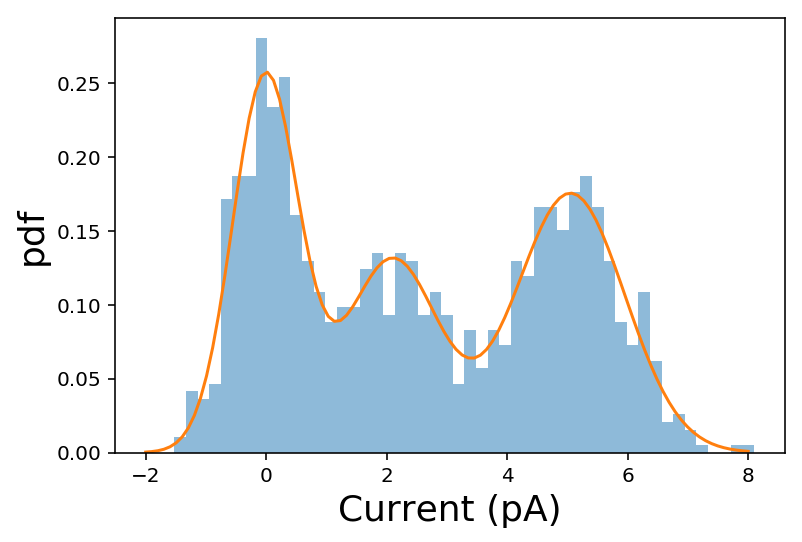

In [27]:
def threeGaussPdf(x, params):
    A1, mu1, sd1, A2, mu2, sd2, mu3, sd3 = params
    
    # make sum of amplitudes == 1
    if A1 + A2 > 1:
        A12 = A1 + A2
        A1 /= A12
        A2 /= A12
    A3 = 1 - A1 - A2
    
    # three gauss pdfs
    g1 = st.norm.pdf(x, mu1, sd1)
    g2 = st.norm.pdf(x, mu2, sd2)
    g3 = st.norm.pdf(x, mu3, sd3)
    
    # return pdf = weighted sum of gauss pdfs
    return A1 * g1 + A2 * g2 + A3 * g3

def negloglikelihood(params):
    pdf = threeGaussPdf(current_pA, params)
    return -np.log(pdf).sum()

guess = [0.3, 0, 1, 0.3, 2, 1, 5, 1]  # initial guess for A1, mu1, sd1, A2, mu2, sd2, mu3, sd3
bnds = opt.Bounds([0, -2, 0.1, 0, -2, 0.1, -2, 0.1], [1, 10, 5, 1, 10, 5, 10, 5])  # [lower bounds], [upper bounds]
result = opt.minimize(negloglikelihood, guess, method='slsqp', bounds=bnds)

plt.hist(current_pA, bins=50, density=True, alpha=0.5)
amps_pA = np.linspace(-2, 8, 100)
plt.plot(amps_pA, threeGaussPdf(amps_pA, result.x))
plt.xlabel('Current (pA)')
plt.ylabel('pdf');

mu1 = result.x[1]
mu2 = result.x[4]
mu3 = result.x[6]
currentLevels_pA = np.array([mu1, mu2, mu3])

# V = IR ==> g = 1/R = I/V
conductances_pS = currentLevels_pA / 0.05

print(f"Channel's conductance levels are {conductances_pS} pS.")